In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
                       
education = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [15]:
education2 = education.copy()

fill_list = ['ENROLL',
             'TOTAL_REVENUE',
             'FEDERAL_REVENUE',
             'STATE_REVENUE',
             'LOCAL_REVENUE',
             'TOTAL_EXPENDITURE',
             'INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE',
             'CAPITAL_OUTLAY_EXPENDITURE',
             'GRADES_PK_G',
             'GRADES_KG_G',
             'GRADES_4_G',
             'GRADES_8_G',
             'GRADES_12_G',
             'GRADES_1_8_G',
             'GRADES_9_12_G',
             'GRADES_ALL_G',
             'AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE',
             'AVG_READING_4_SCORE',
             'AVG_READING_8_SCORE']

states = education2.STATE.unique()
years = education2.YEAR.unique()

for col in fill_list:
    for state in states:
        education2.loc[education2['STATE'] == state,
                       col] = education2.loc[education2['STATE'] == state, col].interpolate()

In [46]:
print(education2.isnull().sum())
print(years)

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64
[1992 2001 1993 2016 1994 1995 1996 1997 1998 1999 2017 2000 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [19]:
for col in fill_list:
    education2.loc[:, col] = education2.loc[:, col].interpolate()
    
education2 = education2.dropna()

In [20]:
print(education2.isnull().sum())

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64


In [22]:
education2.describe()


['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_EDUCATION' 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY'
 'U.S._VIRGIN_ISLANDS' 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)' 'BIE'
 'DOD_-_FOREIGN' 'COMMONWEALTH_OF_MARIANAS' 'AS' 'GU' 'MP' 

In [62]:
new_york = education2.loc[education2['STATE'] == 'NEW_YORK']
#check to make sure there are no outliers
q75, q25 = np.percentile(education2['AVG_MATH_4_SCORE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((new_york['AVG_MATH_4_SCORE '] > max_val) 
                      | new_york['AVG_MATH_4_SCORE ']< min_val))[0]))
    )

The score threshold is: 1.0


KeyError: 'AVG_MATH_4_SCORE '

([<matplotlib.axis.XTick at 0x1a20745ef0>,
 <a list of 26 Text xticklabel objects>)

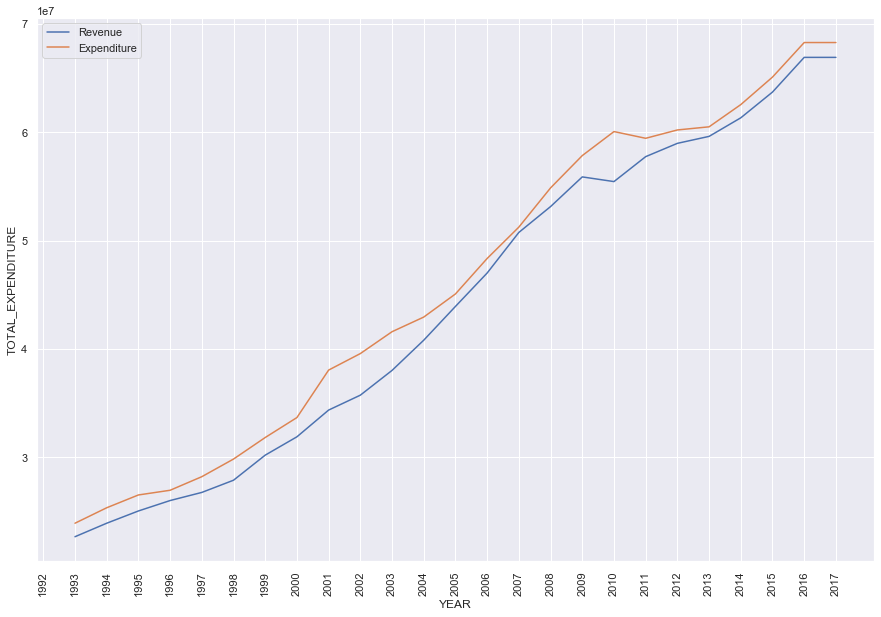

In [50]:
sns.set()
plt.subplots(figsize=(15,10))
ax = sns.lineplot(data=new_york, y='TOTAL_REVENUE', x='YEAR', label='Revenue')
ax1 = sns.lineplot(data=new_york, y='TOTAL_EXPENDITURE', x='YEAR', label='Expenditure')
plt.xticks(range(1992,2018), rotation='vertical')

There is a relatively large difference in budget in 2001 and again in 2010. I imagine the defecit issue in 2001 and 2002 have something to do with the attacks of 9/11. And when looking at the 2010 in expense and corresponding lack of revenue coincides with a serious budget issues across the state.

The difference between math and reading scores 4 is
85      -6.742172
137     -6.779729
190     -6.817286
241     -6.854843
292     -6.169634
344     -5.484425
396     -4.799215
449     -4.114006
501     -7.323293
552    -10.532581
605    -13.741868
656    -14.610323
708    -15.478777
760    -17.134884
813    -18.790991
865    -17.531670
921    -16.272350
973    -15.649241
1025   -15.026132
1077   -15.781293
1129   -16.536454
1180   -15.343539
1231   -14.150624
1282   -13.907533
1479   -13.664442
dtype: float64
The difference between math and reading scores 8 is
85      -6.932787
137     -8.285878
190    -10.472694
241     -2.186139
292     -5.737289
344     -9.288439
396    -12.839589
449    -16.390739
501    -14.997740
552    -13.604741
605    -24.738429
656    -19.897657
708    -15.056885
760    -12.130106
813     -9.203327
865    -12.356193
921    -15.509059
973    -18.884410
1025   -22.259762
1077   -14.879909
1129    -7.500056
1180    -8.367782
1231    -9.235509
1282   -17.672483

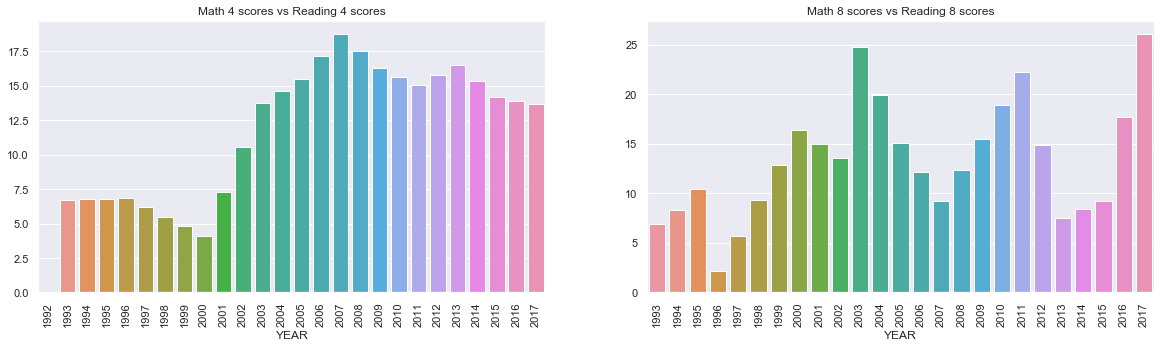

In [90]:
plt.subplots(figsize=(20,5))

plt.subplot(121)
ax = sns.barplot(education2.YEAR, education2.loc[education2.STATE == 'NEW_YORK', 'AVG_MATH_4_SCORE'] - education2.loc[education2.STATE == 'NEW_YORK', 'AVG_READING_4_SCORE'])
plt.xticks(rotation='vertical')
plt.title('Math 4 scores vs Reading 4 scores')
plt.subplot(122)
ax = sns.barplot(new_york.YEAR, new_york.AVG_MATH_8_SCORE - new_york.AVG_READING_8_SCORE)
plt.xticks(rotation='vertical')
plt.title('Math 8 scores vs Reading 8 scores')


print('The difference between math and reading scores 4 is')
print(education2.loc[education2.STATE == 'NEW_YORK', 'AVG_READING_4_SCORE'] - education2.loc[education2.STATE == 'NEW_YORK', 'AVG_MATH_4_SCORE'] )
print('The difference between math and reading scores 8 is')
print(education2.loc[education2.STATE == 'NEW_YORK', 'AVG_READING_8_SCORE'] - education2.loc[education2.STATE == 'NEW_YORK', 'AVG_MATH_8_SCORE'] )
print(new_york.AVG_READING_8_SCORE - new_york.AVG_MATH_8_SCORE)

Text(0.5, 1.0, 'Reading 8')

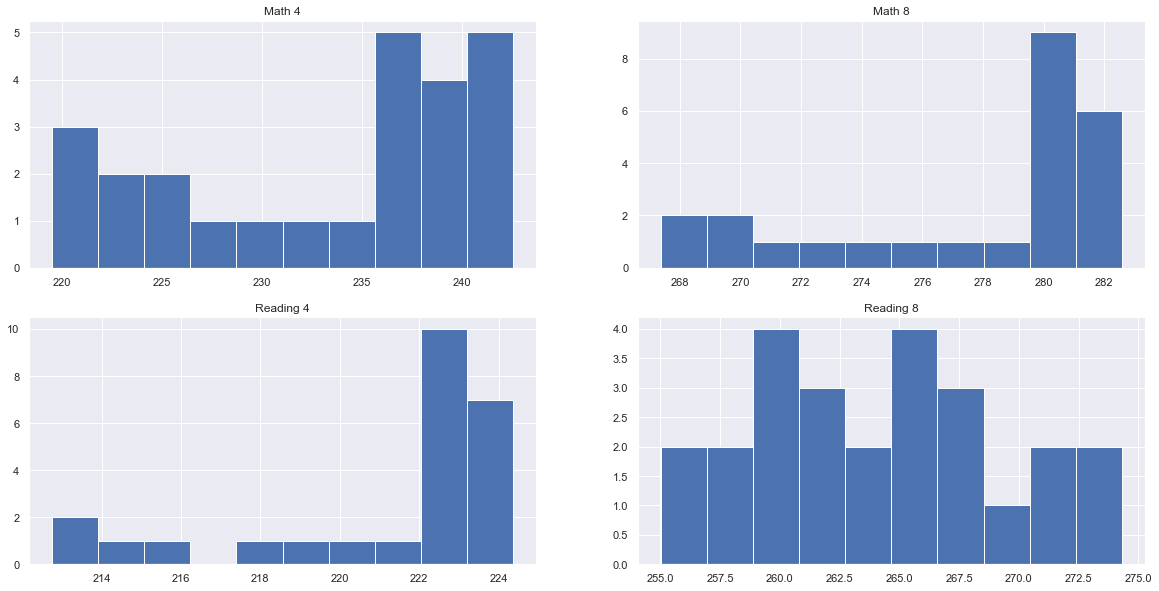

In [99]:
plt.subplots(figsize=(20,10))

plt.subplot(221)
plt.hist(new_york.AVG_MATH_4_SCORE)
plt.title('Math 4')

plt.subplot(222)
plt.hist(new_york.AVG_MATH_8_SCORE)
plt.title('Math 8')

plt.subplot(223)
plt.hist(new_york.AVG_READING_4_SCORE)
plt.title('Reading 4')

plt.subplot(224)
plt.hist(new_york.AVG_READING_8_SCORE)
plt.title('Reading 8')



the distributions of these histograms are hard to tell

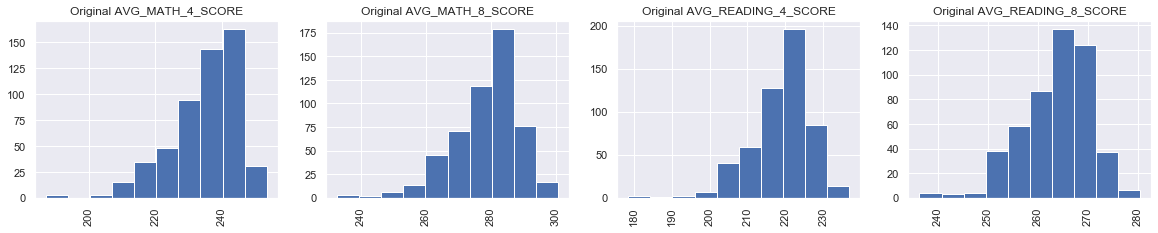

In [112]:
fig = plt.figure(figsize=(20,15))
plt_list = ['AVG_MATH_4_SCORE',
           'AVG_MATH_8_SCORE',
           'AVG_READING_4_SCORE',
           'AVG_READING_8_SCORE']

for i, col in enumerate(plt_list):
    plt.subplot(len(plt_list), 4, i+1)
    plt.hist(education[col])
    plt.xticks(rotation='vertical')
    plt.title("Original {}".format(col))
    


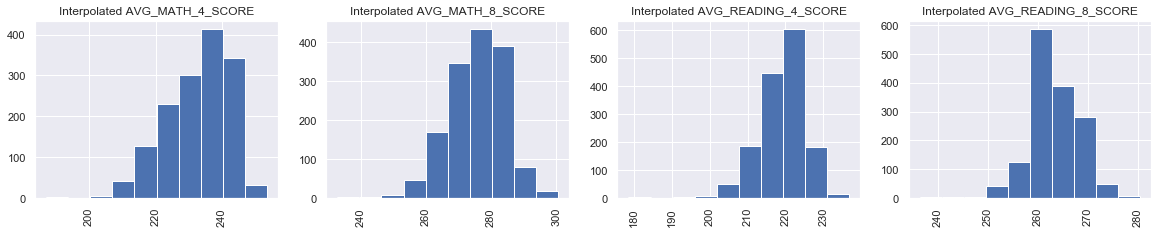

In [114]:
fig = plt.figure(figsize=(20,15))
for i, col in enumerate(plt_list):
    plt.subplot(len(plt_list), 4, i+1)
    plt.hist(education[col].fillna(education[col].interpolate()))
    plt.xticks(rotation='vertical')
    plt.title("Interpolated {}".format(col))

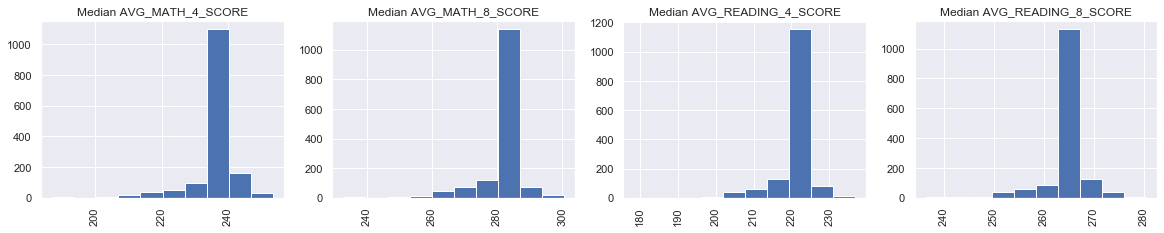

In [111]:
fig = plt.figure(figsize=(20,15))
for i, col in enumerate(plt_list):
    plt.subplot(len(plt_list), 4, i+1)
    plt.hist(education[col].fillna(education[col].median()))
    plt.xticks(rotation='vertical')
    plt.title("Median {}".format(col))

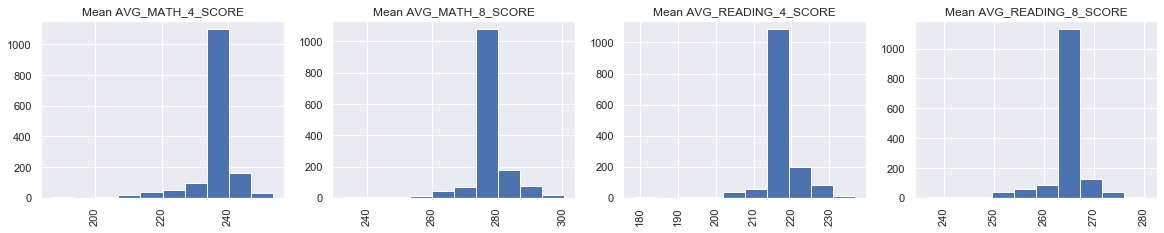

In [113]:
fig = plt.figure(figsize=(20,15))
for i, col in enumerate(plt_list):
    plt.subplot(len(plt_list), 4, i+1)
    plt.hist(education[col].fillna(education[col].mean()))
    plt.xticks(rotation='vertical')
    plt.title("Mean {}".format(col))